# Learning from data HW 5

## Linear Regression Error
Consider a noisy target y = w∗T x + , where x ∈ R
d
(with the added coordinate
x0 = 1), y ∈ R, w∗
is an unknown vector, and  is a noise term with zero mean and
σ
2 variance. Assume  is independent of x and of all other ’s. If linear regression
is carried out using a training data set D = {(x1, y1), . . . ,(xN , yN )}, and outputs the
parameter vector wlin, it can be shown that the expected in-sample error Ein with
respect to D is given by:
ED[Ein(wlin)] = σ
2

1 −
d + 1
N

### 1)
For σ = 0.1 and d = 8, which among the following choices is the smallest
number of examples N that will result in an expected Ein greater than 0.008?

- [a] 10
- [b] 25
- [c] 100
- [d] 500
- [e] 1000

In [39]:
# Defining the expression to plug in the different Ns

def e_in(N):
    return (0.01*((1-(float(9)/N))))

In [40]:
X = [10, 25, 100, 500, 1000]

for i in X:
    print "{0:0.4f}".format(e_in(i))

0.0010
0.0064
0.0091
0.0098
0.0099


As we can tell, the third value (100) is the first to cross the 0.008 limit

## Gradient Descent
Consider the nonlinear error surface E(u, v) = (uev − 2ve−u)

### 4)
We start at the point
(u, v) = (1, 1) and minimize this error using gradient descent in the uv space. Use
η = 0.1 (learning rate, not step size).

4. What is the partial derivative of E(u, v) with respect to u, i.e., ∂E
∂u ?
[a] (uev − 2ve−u
)
2
[b] 2(uev − 2ve−u
)
[c] 2(e
v + 2ve−u
)
[d] 2(e
v − 2ve−u
)(uev − 2ve−u
)
[e] 2(e
v + 2ve−u
)(uev − 2ve−u
)

Using the chain rule, and that $\frac{d}{dx} e^{-x} = -e^{-x}$, we quickly find that the answer is **e)**

### 5)

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def E_uv(u, v):
    return (u * np.exp(v) - 2 * v * np.exp(-u))**2

In [48]:
def dE_du(u, v):
    return 2*(np.exp(v) + 2* v * np.exp(-u)) * (u * np.exp(v) - 2 * v * np.exp(-u))

In [45]:
def dE_dv(u, v):
    return 2 * (u * np.exp(v) - 2 * np.exp(-u)) * (u * np.exp(v) - 2 * v * np.exp(-u))

In [55]:
# Gradient descent maafaakkaaas
# In this here case we don't explicitly work with weights w(t), but rather u and v

# Step 1 - Initialize w(0)

u_0 = 1
v_0 = 1

# We set u and v in time t to this before the first iteration

u_t = u_0
v_t = v_0

# We set the initial error value, and E_t to match this before any iterations of SGD

E_0 = E_uv(u_0, v_0)

E_t = E_0

tolerance = 1e-14

# Set the learning rate
# Set iterator to 0
rate = 0.1
iterations = 0

while E_t > tolerance:
    
    # Calculate new weights
    u_t1 = u_t - rate * dE_du(u_t, v_t)
    v_t1 = v_t - rate * dE_dv(u_t, v_t)
    
    # Set new weights to time t
    u_t = u_t1
    v_t = v_t1
    
    # Calculate new error value in time t
    E_t1 = E_uv(u_t, v_t)
    
    E_t = E_t1
    
    print ('E_t fot t = {} was {}').format(iterations, E_t)
    
    iterations += 1
    
print ('Tolerance reached after {} iterations').format(iterations)
print ('The current (u,v) is ({},{})').format(u_t, v_t)


E_t fot t = 0 was 1.15950972997
E_t fot t = 1 was 1.00740748296
E_t fot t = 2 was 0.0990091216273
E_t fot t = 3 was 0.00866064536281
E_t fot t = 4 was 0.000181755791728
E_t fot t = 5 was 1.29723984784e-06
E_t fot t = 6 was 7.29152469846e-09
E_t fot t = 7 was 4.00999789056e-11
E_t fot t = 8 was 2.20168344841e-13
E_t fot t = 9 was 1.20868339442e-15
Tolerance reached after 10 iterations
The current (u,v) is (0.0447362903978,0.0239587140991)


We reach the given level of error tolerance after **10** iterations, meaning the correct answer is **d)**.

### 6)

In the Euclidean plane, if p = (p1, p2) and q = (q1, q2) then the distance is given by

${\displaystyle \mathrm {d} (\mathbf {p} ,\mathbf {q} )={\sqrt {(q_{1}-p_{1})^{2}+(q_{2}-p_{2})^{2}}}.}$

This is equivalent to the Pythagorean theorem.

In [58]:
def euclidean_distance(u, v, point):
    return np.sqrt((u-point[0])**2 + (v-point[1])**2)

u_t = 0.0447362903978
v_t = 0.0239587140991

a = [1, 1]
b = [0.713, 0.045]
c = [0.016, 0.112]
d = [-0.083, 0.029]
e = [0.045, 0.024]

print ('Distance to a is {}').format(euclidean_distance(u_t, v_t, a))
print ('Distance to b is {}').format(euclidean_distance(u_t, v_t, b))
print ('Distance to c is {}').format(euclidean_distance(u_t, v_t, c))
print ('Distance to d is {}').format(euclidean_distance(u_t, v_t, d))
print ('Distance to e is {}').format(euclidean_distance(u_t, v_t, e))


Distance to a is 1.36571788692
Distance to b is 0.668594885774
Distance to c is 0.0926123232022
Distance to d is 0.127835732282
Distance to e is 0.000266921861049


We can see from the above that the distance to **e** is the smallest.

### 7) 
Now, we will compare the performance of “coordinate descent.” In each iteration,
we have two steps along the 2 coordinates. Step 1 is to move only along
the u coordinate to reduce the error (assume first-order approximation holds
like in gradient descent), and step 2 is to reevaluate and move only along the v
coordinate to reduce the error (again, assume first-order approximation holds).
Use the same learning rate of η = 0.1 as we did in gradient descent. What will
the error E(u, v) be closest to after 15 full iterations (30 steps)?

[a] 10−1
[b] 10−7
[c] 10−14
[d] 10−17
[e] 10−20

In [61]:
# Gradient descent maafaakkaaas
# In this here case we don't explicitly work with weights w(t), but rather u and v

# Step 1 - Initialize w(0)

u_0 = 1
v_0 = 1

# We set u and v in time t to this before the first iteration

u_t = u_0
v_t = v_0

# We set the initial error value, and E_t to match this before any iterations of SGD

E_0 = E_uv(u_0, v_0)

E_t = E_0

tolerance = 1e-14

# Set the learning rate
# Set iterator to 0
rate = 0.1
iterations = 0

while iterations < 15:
    
    # Calculate new u weight 
    u_t1 = u_t - rate * dE_du(u_t, v_t)
    u_t = u_t1
    
    # Calculate new v weight and update error
    v_t1 = v_t - rate * dE_dv(u_t, v_t)
    v_t = v_t1
    
    E_t1 = E_uv(u_t, v_t)
        
    E_t = E_t1
    
    print ('E_t for t = {} was {}').format(iterations, E_t)
    
    iterations += 1
    
print ('Estimated error after 15 iterations: {}').format(E_t)
print ('The current (u,v) is ({},{})').format(u_t, v_t)

E_t for t = 0 was 34.2901631123
E_t for t = 1 was 0.534142591372
E_t for t = 2 was 0.432660827324
E_t for t = 3 was 0.365039735019
E_t for t = 4 was 0.31646807536
E_t for t = 5 was 0.279763423064
E_t for t = 6 was 0.250986311675
E_t for t = 7 was 0.227783298944
E_t for t = 8 was 0.208656695724
E_t for t = 9 was 0.192605658614
E_t for t = 10 was 0.178934748408
E_t for t = 11 was 0.167145054343
E_t for t = 12 was 0.15686898733
E_t for t = 13 was 0.147829522524
E_t for t = 14 was 0.139813791996
Estimated error after 15 iterations: 0.139813791996
The current (u,v) is (6.29707589931,-2.85230695408)


According to my calculations, the answer should be **a)**. Barring any misunderstandings regarding the algorithm, of course.

## Logistic Regression
In this problem you will create your own target function f (probability in this case)
and data set D to see how Logistic Regression works. For simplicity, we will take f
to be a 0/1 probability so y is a deterministic function of x.

Take d = 2 so you can visualize the problem, and let X = [−1, 1]×[−1, 1] with uniform
probability of picking each x ∈ X . Choose a line in the plane as the boundary between
f(x) = 1 (where y has to be +1) and f(x) = 0 (where y has to be −1) by taking two
random, uniformly distributed points from X and taking the line passing through
4
them as the boundary between y = ±1. Pick N = 100 training points at random
from X , and evaluate the outputs yn for each of these points xn.

Run Logistic Regression with Stochastic Gradient Descent to find g, and estimate Eout
(the cross entropy error) by generating a sufficiently large, separate set of points to
evaluate the error. Repeat the experiment for 100 runs with different targets and take
the average. 

Initialize the weight vector of Logistic Regression to all zeros in each
run. Stop the algorithm when kw(t−1) − w(t)k < 0.01, where w(t) denotes the weight
vector at the end of epoch t. An epoch is a full pass through the N data points (use a
random permutation of 1, 2, · · · , N to present the data points to the algorithm within
each epoch, and use different permutations for different epochs). Use a learning rate
of 0.01.

In [175]:
def create_target():

    targetA = np.random.uniform(-1, 1, 2)
    targetB = np.random.uniform(-1, 1, 2)

    w_1 = (targetB[0] - targetA[0]/targetB[1] - targetA[1])
    w_0 = targetA[1] - w_1 * targetA[0]
    
    w_fx = np.array((w_0, w_1))
    
    # print ('Created initial random line with weights: {}').format(w_fx)

    return w_fx

In [108]:
weights = create_target()

Created initial random line with weights: [ 2.81149345  4.95101121]


In [116]:
# Helper functions to switch between 2 and 3-dimensional weight vectors
# In effect these functions add and remove a constant column  of 1's (w0 = 1)
# This is stolen from a solution to the task. The point is to simplify calculation of labels, 
# as the X matrix is 3-dimensional

w_3dim_to_2dim_2 = lambda w_3dim:  -(w_3dim)[:2]
w_2dim_to_3dim = lambda w_2dim:  np.hstack((-w_2dim, 1))

In [118]:
# This is stolen from http://nbviewer.jupyter.org/github/tournami/Learning-From-Data-MOOC/blob/master/Homework%205.html
# Not entirely sure why the signs are evaluated using a dot product in the below way, 
# but I'll accept it to get on with it
# Would have used the sign of the determinant of ([x2-x1, x3-x1], [y2-y1, y3-y1]) had I had the time and interest to
# do it from scratch. See week 1 for my own implementation of this.

def create_random_points_and_labels(N, weights_fx):
    """Creates N random points in the space of  [−1, 1] × [−1, 1]
       and them labels them based on what side of of the line they
       land on based on weights_fx.
       
    Args:
    
        N: Number of random points
        weights_fx:  tuple representing (intercept, slope) of f(x)
    
    Returns:
    
        A tuple of the following items:
            X: an N X D array representing the coordinates of of the points
            Y: an N X 1 array representing +1 or -1 depending on which side of
               the points land in relation to fx 
    """
    
    X = np.hstack((np.ones((N, 1)), np.random.uniform(-1,1,(N,2)))) # Creates an X matrix with an intercept column of 1s and random x1s and x2s
    
    w_fx = w_2dim_to_3dim (weights_fx) # Makes the weights three-dimensional to match the X vector (not sure he wouldn't just add the column of 1s to the X matrix at the end, though?)
    score = np.dot(X, w_fx)
    
    Y = np.where(np.exp(score) / (1 + np.exp(score))> 0.5 , 1, -1)
    Y = np.expand_dims(Y, 1) # need to change array into vector for calcs to work out!
    
    return(X, Y, w_fx)

In [120]:
# Also stealing a helper function to plot the lines and points as we go along

def plot_points_and_lines(weights_fx, X, Y, color="blue", label="f(x)"):
    """Creates the plot of f(x) and g(x) lines along with labeled points
    
       Args:
        weights_fx:  tuple representing (intercept, slope) of f(x)
        weights_gx:  tuple representing (intercept, slope) of g(x)
        X: an N X D array representing the coordinates of of the points
        Y: an N X 1 array representing +1 or -1
        
    """
    
    line = np.linspace(-1, 1, 1001) # points from 0-1000
    
    plt.plot(line, line * weights_fx[1] + weights_fx[0], label=label, color=color) # makes f(x) line
    
    plt.ylim(-1, 1)
    plt.xlim(-1, 1)
    
    plt.scatter(X[:, 1][Y.ravel()==1],  X[:, 2][Y.ravel()== 1], marker="+", c=("r"), label="+")
    plt.scatter(X[:, 1][Y.ravel()==-1], X[:, 2][Y.ravel()==-1], marker="_", c=("b"), label="-")# colored based on Y = +1 or -1
    plt.legend(loc="best")

Created initial random line with weights: [-0.4637157   1.96871213]


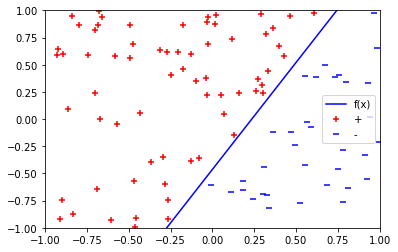

In [122]:
w_fx = create_target()
X, Y, w = create_random_points_and_labels(100, w_fx)
plot_points_and_lines(w_fx, X, Y)

In [168]:
def logistic_regression_SGD(N=100):
       
    w_fx = create_target()  # make a random f(x)
    X, Y, w_fx_3d = create_random_points_and_labels(N, w_fx) # now create points and labels
        
    epsilon = 0.01
    eta = 0.01
    epoch = 0
    
    w_gx_t = np.zeros(len(w_fx_3d))  # initialize your g(x) weights to zero
    
    tolerance = np.inf # initialize an arbitrary hight tolerance infinity should work ;)
    tolerances = [] # to create a nice graph to look at our ||w(t-1) - w(t)|| over epochs
    
    while tolerance > epsilon: 
        idx = np.arange(N)
        np.random.shuffle(idx) # shuffle indices
        
        w_gx = np.copy(w_gx_t) # w(n) = w(t)
                               # I have to make a deep copy or else 
                               # I'll create a cyclic reference!
        gradient = 0
        
        for n in idx: # go through shuffled data points and labels
            gradient = - (Y[n] * X[n])/(1 + np.exp(Y[n] * np.dot(w_gx, X[n]))) # no need to sum and divide by N = 1 
            w_gx -= eta * gradient # stochastic update for single data point
            
            # This is the whole point of SGD
            # Instead of calculating a batch GD, that moves the weights once based on the average gradient,
            # we calculate the specific gradient for each point and update the weights as we go
            # The randomization of the N points is the stochastic element of this GD implementation
        

        # print w_gx
        
        w_gx_t_1 = w_gx  # w(t+1) = w(N)
        
        tolerance = np.linalg.norm(w_gx_t - w_gx_t_1)# ||w(t) - w(t + 1)||
        # print np.linalg.norm(w_gx_t - w_gx_t_1)
        tolerances.append(tolerance)
        
        w_gx_t = w_gx_t_1 # w(t) = w(t + 1)
        epoch += 1
    
    w_gx_3d = w_gx_t
    
    return (w_fx_3d, w_gx_3d, X, Y, epoch, tolerances)

In [169]:
w_fx_3d, w_gx_3d, X, Y, epoch, tolerances = logistic_regression_SGD()
print("This run took approximately {} epochs.".format(epoch))

Created initial random line with weights: [-1.07536728 -1.03279408]
This run took approximately 352 epochs.


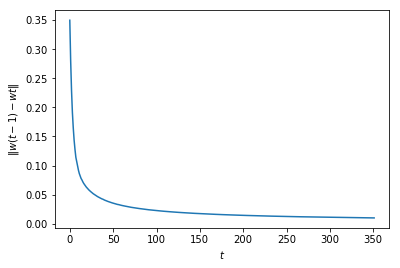

In [170]:
plt.xlabel("$t$")
plt.ylabel("$\Vert w{(t-1)} -  w{t}\Vert$")
plt.plot(tolerances)

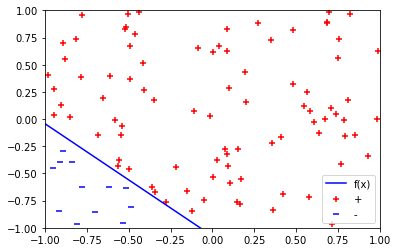

In [171]:
plt.title
plot_points_and_lines(w_3dim_to_2dim(w_fx_3d), X, Y)

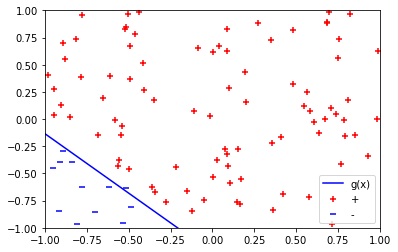

In [172]:
plot_points_and_lines(w_3dim_to_2dim(w_gx_3d), X, Y, label="g(x)")

### 8. 
Which of the following is closest to Eout for N = 100?
[a] 0.025
[b] 0.050
[c] 0.075
[d] 0.100
[e] 0.125

In [178]:
# In order to find the answer to 8), we simply run the above algorithm 100 times
runs = 100
E_outs = np.zeros(runs)
epochs = np.zeros(runs)

for run in range(runs):
    w_fx_3d, w_gx_3d, X, Y, epoch, tolerances = logistic_regression_SGD(N=100)
    E_outs[run] = np.mean(np.log(1 + np.exp(-Y * np.expand_dims(np.dot(X, w_gx_3d), 1))))
    epochs[run] = epoch
    
avg_E_out = np.mean(E_outs)
avg_epochs = np.mean(epochs)

In [179]:
print("The average E_out over a 100 runs is {}".format(round(avg_E_out, 3)))

The average E_out over a 100 runs is 0.089


We see that the answer for **8)** should be [d] - 0.100

### 9. 

How many epochs does it take on average for Logistic Regression to converge for
N = 100 using the above initialization and termination rules and the specified
learning rate? Pick the value that is closest to your results.
[a] 350
[b] 550
[c] 750
[d] 950
[e] 1750

In [180]:
print("The average epochs over a 100 runs is {}".format(int(avg_epochs)))

The average epochs over a 100 runs is 319


We see that the answer for **9)** should be **[a]** - 350